# HW6
# Hyunwoo Roh

# Question 1-(a)
Import the data using pandas.read csv() function. Look for characters
that seem out of place that might indicate missing values. Replace them
with missing values using the na values=... option.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
df=pd.read_csv("data\Auto.csv", na_values='?')
df.shape

(397, 9)

In [3]:
df.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite


# Question 1-(b)
Produce a scatterplot matrix which includes all of the quantitative variables

In [4]:
df1 = df.drop(labels='name', axis=1)

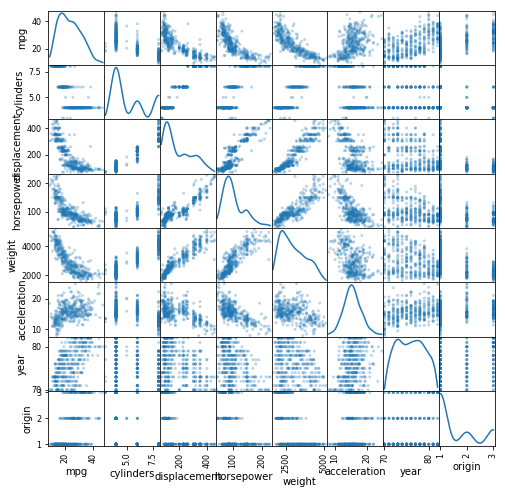

In [5]:
from pandas.plotting import scatter_matrix
df1.dropna(inplace=True)
# axis 1 drops columns, 0 will drop rows that match index value in labels
df1=df1.astype(float)
scatter_matrix(df1, alpha=0.3, ax=None, figsize=(8,8),diagonal='kde')
plt.show()

# Question 1-(c)
Compute the correlation matrix for the quantitative variables (8×8) using the DataFrame.corr() method.

In [6]:
df1.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


# Question 1-(d)
Estimate the following multiple linear regression model of mpg on all other quantitative variables, where ui is an error term for each observation, using Python’s statsmodels.api.OLS() function.

In [7]:
df1.insert(loc=1, column='const', value=1)
Y = df1.iloc[:,0] # mpg
X = df1.iloc[:,1:9] # rest
reg1 = sm.OLS(endog=Y,exog=X, missing='drop')
results1 = reg1.fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Tue, 19 Feb 2019   Prob (F-statistic):          2.04e-139
Time:                        23:56:17   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707   

**1. Displacements, weight, year, and origin are statisticaly significant at the 1% level.
<br>2. Cylinders, horsepower, acceleration are not statisticaly significant at the 10% level.
<br>3. If we control all other variables, one year recent car has a 0.75 unit increased mpg.**

# Question 1-(e)
Looking at your scatterplot matrix from part (b), what are the three variables that look most likely to have a nonlinear relationship with mpgi?

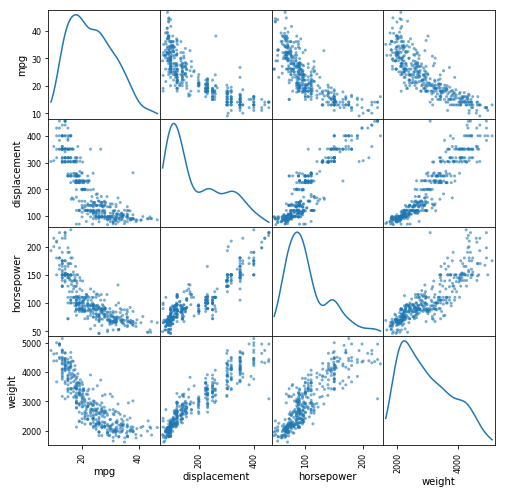

In [15]:
# CDisplacement, horsepower, weight
df2 = df.iloc[:,[0,2,3,4]]
# axis 1 drops columns, 0 will drop rows that match index value in labels
df2=df2.astype(float)
scatter_matrix(df2, alpha=0.6, ax=None, figsize=(8,8),diagonal='kde')
plt.show()

In [16]:
df2.corr()

,mpg,displacement,horsepower,weight
mpg,1.000000,-0.804443,-0.778427,-0.831739
displacement,-0.804443,1.000000,0.897257,0.933104
horsepower,-0.778427,0.897257,1.000000,0.864538
weight,-0.831739,0.933104,0.864538,1.000000


We can clearly see the nonlinear relationship with mpg for 3 variables above.

In [17]:
# Define 3 new variables

df1['displacement_sq']=np.square(df1['displacement'])
df1['horsepower_sq']=np.square(df1['horsepower'])
df1['weight_sq']=np.square(df1['weight'])
df1['acceleration_sq']=np.square(df1['acceleration'])
df1.shape

(392, 13)

In [18]:
#df1.insert(loc=1, column='const', value=1)
df1.head()

,mpg,const,cylinders,displacement,horsepower,weight,acceleration,year,origin,displacement_sq,horsepower_sq,weight_sq,acceleration_sq
0,18.0,1,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,94249.0,16900.0,12278016.0,144.00
1,15.0,1,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,122500.0,27225.0,13638249.0,132.25
2,18.0,1,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,101124.0,22500.0,11806096.0,121.00
3,16.0,1,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,92416.0,22500.0,11785489.0,144.00
4,17.0,1,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,91204.0,19600.0,11895601.0,110.25


In [19]:
Y = df1.iloc[:,0] # mpg
X2 = df1.iloc[:,1:13] # rest
reg2 = sm.OLS(endog=Y,exog=X2, missing='drop')
results2 = reg2.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     230.2
Date:                Tue, 19 Feb 2019   Prob (F-statistic):          1.75e-160
Time:                        23:57:40   Log-Likelihood:                -962.02
No. Observations:                 392   AIC:                             1948.
Df Residuals:                     380   BIC:                             1996.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              20.1084      6.696     

**1. Three variables that I chose are displacement, horsepower, and weight
<br>2. Adjusted  𝑅2  is 0.866 and it is higher(better) than 0.818 in the first model.
<br>3. Both displacement and its squared term became stastistically not significant after we include the squared terms. This is because the accerlation and its squared term took all the explanatory power from them in that they have very strong correlation each other. This is a problem of multicollinearity. 
<br>4. In case of cylinder, it went same way as displacement. It is not statistically significant at the 5% level. Since displacement, horsepower, cylinder, and weights are highly correlated each other, in this regression horsepower, weight and its equared terms took all the explanatory power from displacement and cyliners.**

# Question 1-(f)
Using the regression model from part (e) and the .predict() function, what would be the predicted miles per gallon mpg of a car with 6 cylinders,displacement of 200, horsepower of 100, a weight of 3100, acceleration of 15.1, model year of 1999, and origin of 1?

In [20]:
X_predict=[1,6,200,100,3100,15.1,99,1,200**2,100**2,3100**2,15.1**2]
X_predict
results2.predict(X_predict)

array([38.7321111])

# Question 2. Classification Problem: KNN

In [21]:
# Constructing DataFrame from a dictionary
d = {'X1': [0,2,0,0,-1,1],
     'X2': [3,0,1,1,0,1], 
     'X3': [0,0,3,2,1,1], 
     'Y':  ["R","R","R","G","G","R"]}
knn = pd.DataFrame(data=d)
knn['dist'] = round(np.sqrt((knn["X1"]-0)**2+(knn["X2"]-0)**2+(knn["X3"]-0)**2),3)
knn

,X1,X2,X3,Y,dist
0,0,3,0,R,3.000
1,2,0,0,R,2.000
2,0,1,3,R,3.162
3,0,1,2,G,2.236
4,-1,0,1,G,1.414
5,1,1,1,R,1.732


In [22]:
knn.loc[6]=[0,0,0,'B',0]

210


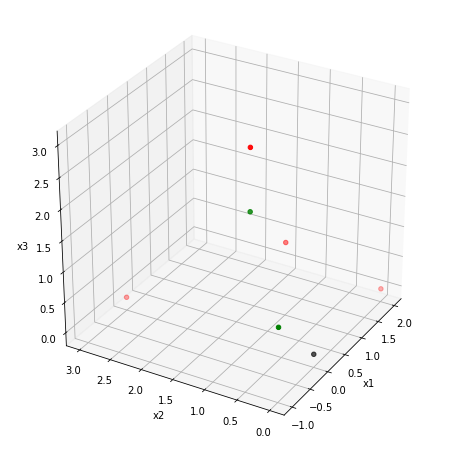

In [23]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points

xdata = knn['X1']
ydata = knn['X2']
zdata = knn['X3']
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
ax.scatter3D(xdata, ydata, zdata, c=('red','red','red','g','g','red','black'))

# Set rotation angle to 30 degrees
ax.view_init(azim=210)
# Get current rotation angle
print(ax.azim)
 

# Question 2-(a)

- D1=3
- D2=2
- D3=$\sqrt10$
- D4=$\sqrt5$
- D5=$\sqrt2$
- D6=$\sqrt3$

# Question 2-(b)

What is our KNN prediction with K = 1? Why?

- We would like to classify the point (0,0,0) into 'red' or 'green' class with K-nearest neighbors. If K=1, KNN algorithm is to start by calculating the distance of point (0,0,0) from all points and find 1 nearest point with least distance to (0,0,0). Here, it is (-1,0,1) that is in green class.

# Question 2-(c)

What is our KNN prediction with K = 3? Why?

- The 3 nearest neighbors are the 2nd, 5th, 6th observations. KNN algorithm assign point (0,0,0) to the class to which majority of the three nearest points belong. So the KNN prediction is red.

# Qeustion 2-(d)
If the Bayes (optimal) decision boundary in this problem is highly nonlinear, then would we expect the best value for K to be large or small? Why?

- Considering the relationship between k and smoothness of the decision boundary where increasing k makes boundary more smoother, highly nonlinear boundary imply that K should be small. Small k leads to very complicated decision boundary. 


# Question 2-(e)
Use Python’s scikit-learn library to estimate the KNN classifier of the test point X1 = X2 = X3 = 1 with K = 2.

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn = pd.DataFrame(data=d)
KNN2 = KNeighborsClassifier(n_neighbors = 2)
neigh2=KNN2.fit(knn[["X1","X2","X3"]], knn["Y"])
print("K=2:",neigh2.predict([(1,1,1)])[0])

KNN1 = KNeighborsClassifier(n_neighbors = 1)
neigh1=KNN1.fit(knn[["X1","X2","X3"]], knn["Y"])
print("K=1:",neigh1.predict([(1,1,1)])[0])

K=2: G
K=1: R


Although it shows that the Green is the predicted class for (1,1,1) point with k=2, if you see the data the nearest two class are Green and Red respectively. Therefore there are tie. In that case, it is reasonable to check wich one that has shorter distance, which is to see case when k equals 1. 

# Question 3: Multivariable logit regression
Use statsmodel.api to estimate the logistic regression of mpg high on the regressors from Exercise 1:

In [28]:
df1['mpg_h']=np.where(df1['mpg']>np.median(df1['mpg']),1,0)
X = df1[['const','cylinders','displacement','horsepower','weight','acceleration','year','origin']]

reg3 = sm.Logit(endog=df1['mpg_h'],exog=X,missing='drop')
results3 = reg3.fit()

print(results3.summary())

Optimization terminated successfully.
         Current function value: 0.200944
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                  mpg_h   No. Observations:                  392
Model:                          Logit   Df Residuals:                      384
Method:                           MLE   Df Model:                            7
Date:                Tue, 19 Feb 2019   Pseudo R-squ.:                  0.7101
Time:                        23:58:56   Log-Likelihood:                -78.770
converged:                       True   LL-Null:                       -271.71
                                        LLR p-value:                 2.531e-79
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.1549      5.764     -2.976      0.003     -28.452      -5.858
cylinders       -0.1626

Coefficient of weight and year are statistically significant at 5% level.

# Question 3-(b)
Divide the data into a training set of half of the data randomly selected and a test set of the remaining half of the data using the .train test split module of the scikit-learn.cross validation package. Set the test size = 0.5 and set the random state=10.

In [29]:
import sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, df1['mpg_h'], test_size = 0.5, random_state=10)

In [30]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((196, 8), (196, 8), (196,), (196,))

# Question 3-(c)
Use scikit-learn to estimate a logistic regression model on the training data.

In [31]:
from sklearn.linear_model import LogisticRegression
log2 = LogisticRegression().fit(X_train, y_train)
coeff=pd.concat([pd.DataFrame(X.columns,columns=["Name"]),
                     pd.DataFrame(np.transpose(log2.coef_),columns=["Value"])],axis = 1)
coeff

C:\Users\ericr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


,Name,Value
0,const,-0.070226
1,cylinders,-0.676048
2,displacement,0.006087
3,horsepower,-0.038023
4,weight,-0.005055
5,acceleration,-0.134894
6,year,0.299868
7,origin,-0.154037


In [32]:
log2.coef_

array([[-0.07022621, -0.67604786,  0.00608728, -0.03802261, -0.00505466,
        -0.13489425,  0.29986833, -0.15403736]])

# Question 3-(d)
Create predicted values of mpg high for the test set and calculate the confusion matrix and classification report for the Logit model on the test data. Does this model predict low mpg (mpg high=0) or high mpg (mpg high=1) better?

In [33]:
y_pred = log2.predict(X_test)
y_pred

array([1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0])

In [34]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[86, 13],
       [12, 85]], dtype=int64)

#### In a binary classification, we can try looking on precision, recall, and f score.

In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87        99
           1       0.87      0.88      0.87        97

   micro avg       0.87      0.87      0.87       196
   macro avg       0.87      0.87      0.87       196
weighted avg       0.87      0.87      0.87       196



- The precision is intuitively the ability of the classifier not to label as positive a sample that is negative, which answers the question of how many selected items are relevant.
- The recall is intuitively the ability of the classifier to find all the positive samples, which answers how many relevant items are selected. 
- F-beta score reaches its best value at 1 and worst score at 0. Since both got a same F1 score, the model has equal prediction ability for both low and high values